In [8]:
# -*- coding:utf-8 -*-
from gensim import models
import numpy as np
import nltk
from sklearn.decomposition import PCA
import jieba
import gensim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec, KeyedVectors,Word2Vec
import jieba.posseg as pseg #加载各库
import pkuseg
import csv
import itertools
import matplotlib.pyplot as plt
# -*- coding:utf-8 -*-
#jieba.load_userdict("userdict.txt")  #加载自定义词典

In [9]:
from nltk.tokenize import MWETokenizer
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词

In [10]:
sentence=str()

with open('WF-CNKI.txt', encoding='utf-8') as f: #加载原始数据库并分词
    document = f.read()
    #document_cut = jieba.cut(document)
    tokenizer = MWETokenizer([('solar', 'cell')], separator = '_')
    seg = pkuseg.pkuseg(user_dict = "userdict.txt")
    text=tokenizer.tokenize(nltk.word_tokenize(document))
    result = ' '.join(text)
    for word in result:
        if word not in stopwords:
            if word != "\t":
                sentence += word

    with open('0828.txt', 'w',encoding="utf-8") as f2:
        f2.write(sentence)

In [11]:
#加载语料
sentences = word2vec.LineSentence('0828.txt') #正式训练前的格式化

In [21]:
#训练语料

model = word2vec.Word2Vec(sentences,sg=1, hs=0,min_count=1,window=10,vector_size=100)


In [22]:
model.wv.save_word2vec_format(r"word2vec0828b.bin") #保存模型

In [25]:
# model = gensim.models.Word2Vec.load('word2vec0828b.bin') #加载模型
model = KeyedVectors.load_word2vec_format(r"word2vec0828b.bin" ,binary= False) 

[[-2.429209   -0.4185361 ]
 [-1.5946292   0.3461516 ]
 [-0.9985866  -0.36804724]
 [ 1.940988    0.23855276]
 [ 3.3450956  -0.34417856]
 [-0.26365933  0.5460573 ]]


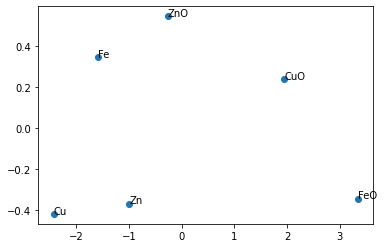

In [29]:
X = np.array(model['Cu','Fe','Zn','CuO','FeO','ZnO']) #选择词
pca = PCA(n_components=2) #选择需要降成的维度
Y = pca.fit_transform(X) #将100维词向量降维成2维

print(Y)
txt = ['Cu','Fe','Zn','CuO','FeO','ZnO','光伏'] #图中每个点的标注

x = Y[:,0] #图中每个点的横坐标

y = Y[:,1] #图中每个点的纵坐标

plt.scatter(x, y)
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.001, y[i]+0.001)) #使用matplotlib在图中画出每个点

plt.show()